In [27]:
import pandas as pd


In [ ]:
df1 = pd.read_csv("C:\\Users\\drago\\IS460\\data\\df1.csv")
df1 = df1.drop('Unnamed: 0', axis = 1)

In [4]:
X = df1.drop('price_boxcox_scaled', axis = 1)
y = df1['price_boxcox_scaled']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape)
print(y_test.shape)

(238021, 9)
(59506,)


In [47]:
from sklearn.neural_network import MLPRegressor

In [36]:
mlp = MLPRegressor(max_iter = 500, activation = 'relu')
mlp

MLPRegressor(max_iter=500)

In [74]:
mlp.fit(X_train,y_train)

MLPRegressor(max_iter=4500)

In [75]:
y_mlp_train_pred = mlp.predict(X_train)
y_mlp_test_pred = mlp.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error

mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)

mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)

In [97]:
mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2','Test MAPE']

In [98]:
mlp_results

,Method,Training MSE,Training R2,Test MSE,Test R2,Test MAPE
0,Multi-Layer Perceptron,0.126674,0.873322,0.127668,0.871895,1.348455


In [80]:
mlp1 = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp1

MLPRegressor(max_iter=1000)

In [81]:
mlp1.fit(X_train,y_train)

MLPRegressor(max_iter=1000)

In [82]:
y_mlp1_train_pred = mlp1.predict(X_train)
y_mlp1_test_pred = mlp1.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

mlp1_train_mse = mean_squared_error(y_train, y_mlp1_train_pred)
mlp1_train_r2 = r2_score(y_train, y_mlp1_train_pred)

mlp1_test_mse = mean_squared_error(y_test, y_mlp1_test_pred)
mlp1_test_r2 = r2_score(y_test, y_mlp1_test_pred)
mlp1_test_mape = mean_absolute_percentage_error(y_test, y_mlp1_test_pred)

In [101]:
mlp1_results = pd.DataFrame(['Multi-Layer Perceptron', mlp1_train_mse, mlp1_train_r2, mlp1_test_mse, mlp1_test_r2,mlp1_test_mape]).transpose()
mlp1_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2','Test MAPE']

In [102]:
mlp1_results

,Method,Training MSE,Training R2,Test MSE,Test R2,Test MAPE
0,Multi-Layer Perceptron,0.125971,0.874026,0.126946,0.87262,1.320629


In [103]:
### checking if increasing no of iterations improve model
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 1000+500*i, activation = 'relu')
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.125607     0.87439  0.126654  0.872912   

  Test MAPE  
0  1.346908  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron      0.12184    0.878157  0.122785  0.876795   

  Test MAPE  
0   1.32374  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.123479    0.876518  0.124434  0.875141   

  Test MAPE  
0  1.349507  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.123148    0.876848  0.124292  0.875283   

  Test MAPE  
0  1.392124  


In [9]:
import scipy
scipy.special.inv_boxcox(0.3686, lmbda = 0)

TypeError: inv_boxcox() takes from 2 to 3 positional arguments but 1 were given

In [2]:
adjrsquared1 = 1-((1-0.876795)*(59506-1)/(59506-8-1))
print(adjrsquared1)

0.8767784337865775


In [73]:
### checking if increasing no of iterations improve model
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 2500+500*i, activation = 'relu')
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method Training MSE Training R2  Test MSE   Test R2
0  Multi-Layer Perceptron     0.126634    0.873362  0.127799  0.871764
                   Method Training MSE Training R2  Test MSE  Test R2
0  Multi-Layer Perceptron     0.122622    0.877375  0.123816  0.87576
                   Method Training MSE Training R2  Test MSE  Test R2
0  Multi-Layer Perceptron     0.122866     0.87713  0.124036  0.87554
                   Method Training MSE Training R2  Test MSE   Test R2
0  Multi-Layer Perceptron     0.126278    0.873718  0.127095  0.872471


In [104]:
### seeing if diff activation functions improve model
activation_type = ['identity','logistic','tanh','relu']

for i in range(0,4):
    mlp = MLPRegressor(max_iter = 1000, activation = activation_type[i])
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2','Test MAPE']
    print(mlp_results)
    
    ###tanh lower MSE and MAPE but relu higher test R-squared

                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.175549    0.824447  0.177376  0.822018   

  Test MAPE  
0  1.556856  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.138572    0.861424  0.139495  0.860028   

  Test MAPE  
0   1.29629  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.135782    0.864215  0.136405  0.863128   

  Test MAPE  
0   1.28243  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.123983    0.876014  0.125071  0.874502   

  Test MAPE  
0  1.353684  


In [105]:
### checking if increasing no of iterations improve model tanh
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 1000+500*i, activation = 'tanh')
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.134151    0.865845  0.135328  0.864209   

  Test MAPE  
0  1.397965  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.133682    0.866315  0.134592  0.864948   

  Test MAPE  
0  1.365513  
                   Method Training MSE Training R2 Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.132832    0.867164  0.13369  0.865853   

  Test MAPE  
0  1.348845  
                   Method Training MSE Training R2 Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.135249    0.864747   0.1359  0.863636   

  Test MAPE  
0  1.304916  


In [4]:
adjrsquared2 = 1-((1-0.863636)*(59506-1)/(59506-8-1))
print(adjrsquared2)

0.8636176644200547


In [ ]:
### MAPE of tanh lower than relu but lower test R2

In [106]:
### checking if increasing no of iterations improve model tanh
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 3000+500*i, activation = 'tanh')
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_train_mse = mean_squared_error(y_train, y_mlp_train_pred)
    mlp_train_r2 = r2_score(y_train, y_mlp_train_pred)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_train_mse, mlp_train_r2, mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.134471    0.865525  0.135565  0.863971   

  Test MAPE  
0  1.385101  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.134357     0.86564  0.135296  0.864241   

  Test MAPE  
0  1.326529  
                   Method Training MSE Training R2  Test MSE  Test R2  \
0  Multi-Layer Perceptron     0.133772    0.866225  0.134729  0.86481   

  Test MAPE  
0  1.346577  
                   Method Training MSE Training R2  Test MSE   Test R2  \
0  Multi-Layer Perceptron     0.134122    0.865875  0.135221  0.864316   

  Test MAPE  
0  1.337493  


### Trying on unscaled price

In [16]:
df_new = pd.read_csv("C:\\Users\\drago\\IS460\\data\\df_prepared.csv")
df_new = df_new.drop('Unnamed: 0', axis = 1)

In [17]:
X = df_new.drop('price', axis = 1)
y = df_new['price']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape)
print(y_test.shape)

(236551, 9)
(59138,)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor

In [21]:
mlp = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp.fit(X_train,y_train)
y_mlp_test_pred = mlp.predict(X_test)
mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
print(mlp_results)

                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  65710876.013315  0.872004  0.485275


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
### checking if increasing no of iterations improve model
for i in range(1,3):
    mlp = MLPRegressor(max_iter = 1000+500*i, activation = 'relu')
    mlp.fit(X_train,y_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  62742832.607655  0.877785   0.45576


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  63793891.154189  0.875738  0.460051


In [19]:
#1500 is the best

In [20]:
activation_type = ['identity','logistic','tanh','relu']

for i in range(0,4):
    mlp = MLPRegressor(max_iter = 1000, activation = activation_type[i])
    mlp.fit(X_train,y_train)
    y_mlp_train_pred = mlp.predict(X_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron', mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2','Test MAPE']
    print(mlp_results)

                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  73029746.130671  0.857748  0.549625
                   Method          Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  513383804.989277 -0.000004  2.370834
                   Method          Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  513383790.057295 -0.000004  2.370856


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  64522880.815933  0.874318  0.468069


In [ ]:
### including more hidden layers to uncover nonlinear relationships

In [ ]:
mlp = MLPRegressor(max_iter = 1500, activation = 'relu', hidden_layers =(100,100,100,))
mlp.fit(X_train,y_train)
y_mlp_test_pred = mlp.predict(X_test)
mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
ml_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
print(mlp_results)

In [ ]:
### change number of hidden units

In [28]:
### checking if increasing no of iterations improve model
for i in range(1,4):
    mlp = MLPRegressor(max_iter = 1500, activation = 'relu',hidden_layer_sizes=(100+50*i,100+50*i,100+50*i,))
    mlp.fit(X_train,y_train)
    y_mlp_test_pred = mlp.predict(X_test)
    mlp_test_mse = mean_squared_error(y_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  50430866.428704  0.901767  0.319129


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  51776443.180937  0.899146  0.326477


C:\Users\drago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


                   Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  66271538.203005  0.870912  0.469502


### took ~ 2hours to train 1 iteration of model

1st iteration
Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  50430866.428704  0.901767  0.319129

2nd iteration
Method         Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  51776443.180937  0.899146  0.326477

In [28]:
import numpy as np

In [51]:
df_new1 = pd.read_csv("C:\\Users\\drago\\OneDrive\\Desktop\\UNI\\Y3S2\\ML&Apps\\df_prepared.csv")
df_new1 = df_new1.drop('Unnamed: 0', axis = 1)

In [52]:
X3 = df_new1.drop('price', axis = 1)
y3 = df_new1['price']
y3 = np.log(y3)

In [54]:
from sklearn.model_selection import train_test_split
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3, test_size = 0.2)
print(X3_train.shape)
print(y3_test.shape)

(236551, 9)
(59138,)


In [55]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor

In [14]:
mlp = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp.fit(X3_train,y3_train)
y3_mlp_test_pred = mlp.predict(X3_test)
mlp_test_mse = mean_squared_error(y3_test, y3_mlp_test_pred)
mlp_test_r2 = r2_score(y3_test, y3_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y3_test, y3_mlp_test_pred)
mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
print(mlp_results)

                   Method  Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.812848 -2.892395  0.209059


In [56]:
for i in range(1,5):
    mlp = MLPRegressor(max_iter = 1000+500*i, activation = 'relu')
    mlp.fit(X3_train,y3_train)
    y_mlp_test_pred = mlp.predict(X3_test)
    mlp_test_mse = mean_squared_error(y3_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y3_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y3_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method  Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  0.169991  0.862384  0.033811
                   Method  Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  0.167011  0.864797  0.033695
                   Method  Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  0.170352  0.862092  0.033858
                   Method  Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  0.168038  0.863965  0.033467


In [57]:
mlp2 = MLPRegressor(max_iter = 2000, activation = 'relu')
mlp2.fit(X3_train,y3_train)
y2_mlp_test_pred = mlp.predict(X3_test)

In [59]:
np.exp(y3_test)

235369    51405.0
46540      2336.0
284341    51595.0
36138      7950.0
114139     9670.0
           ...   
4777       4811.0
82995      3998.0
23401      6395.0
193037     9284.0
283051    69739.0
Name: price, Length: 59138, dtype: float64

In [60]:
np.exp(y2_mlp_test_pred)

array([52353.92770384,  4559.39270184, 47006.62303006, ...,
        7262.77412741,  6332.3410245 , 54175.60262123])

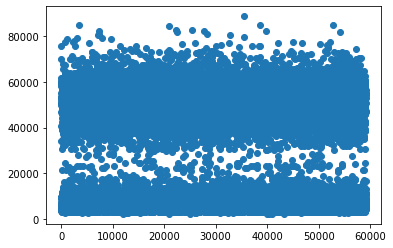

In [61]:
import matplotlib.pyplot as plt
x_values = np.arange(len(y2_mlp_test_pred))
plt.scatter (x_values,np.exp(y2_mlp_test_pred))
plt.show()

In [62]:
mean_squared_error(np.exp(y3_test), np.exp(y2_mlp_test_pred))

64588031.149816774

In [63]:
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y2_mlp_test_pred))

0.3416516487410684

In [64]:
for i in range(1,4):
    mlp = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(100+50*i,100+50*i,100+50*i,))
    mlp.fit(X3_train,y3_train)
    y_mlp_test_pred = mlp.predict(X3_test)
    mlp_test_mse = mean_squared_error(y3_test, y_mlp_test_pred)
    mlp_test_r2 = r2_score(y3_test, y_mlp_test_pred)
    mlp_test_mape = mean_absolute_percentage_error(y3_test, y_mlp_test_pred)
    mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
    mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
    print(mlp_results)

                   Method  Test MSE  Test R2 Test MAPE
0  Multi-Layer Perceptron  0.137398  0.88877   0.02981
                   Method  Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  0.135838  0.890033  0.029418
                   Method  Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  0.135585  0.890238  0.029383


In [65]:
mlp = MLPRegressor(max_iter = 2000, activation = 'relu',hidden_layer_sizes=(200,200,200,))
mlp.fit(X3_train,y3_train)
y4_mlp_test_pred = mlp.predict(X3_test)

In [66]:
mean_squared_error(np.exp(y3_test), np.exp(y4_mlp_test_pred))

55831492.688444555

In [67]:
mean_absolute_percentage_error(np.exp(y3_test), np.exp(y4_mlp_test_pred))

0.28821622750360726

In [19]:
##seems like 1500 iterations is the best

In [34]:
activation_type = ['identity','logistic','tanh','relu']

for i in range(0,4):
    mlp = MLPRegressor(max_iter = 2000, activation = activation_type[i])
    mlp.fit(X3_train,y3_train)
    y_mlp_train_pred = mlp.predict(X3_train)
    y_mlp_test_pred = mlp.predict(X3_test)
    mlp_test_mse1 = mean_squared_error(y3_test, y3_mlp_test_pred)
    mlp_test_r21 = r2_score(y3_test, y3_mlp_test_pred)
    mlp_test_mape1 = mean_absolute_percentage_error(y3_test, y3_mlp_test_pred)
    mlp_results1 = pd.DataFrame(['Multi-Layer Perceptron', mlp_test_mse1, mlp_test_r21,mlp_test_mape1]).transpose()
    mlp_results1.columns = ['Method', 'Test MSE', 'Test R2','Test MAPE']
    print(mlp_results)

                   Method Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.47306 -2.603898  0.198911
                   Method Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.47306 -2.603898  0.198911
                   Method Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.47306 -2.603898  0.198911
                   Method Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  4.47306 -2.603898  0.198911


In [25]:
mlp = MLPRegressor(max_iter = 2000, activation = 'identity')
mlp.fit(X3_train,y3_train)
y3_mlp_test_pred = mlp.predict(X3_test)
mlp_test_mse = mean_squared_error(y3_test, y3_mlp_test_pred)
mlp_test_r2 = r2_score(y3_test, y3_mlp_test_pred)
mlp_test_mape = mean_absolute_percentage_error(y3_test, y3_mlp_test_pred)
mlp_results = pd.DataFrame(['Multi-Layer Perceptron',mlp_test_mse, mlp_test_r2,mlp_test_mape]).transpose()
mlp_results.columns = ['Method', 'Test MSE', 'Test R2', 'Test MAPE']
print(mlp_results)

                   Method   Test MSE   Test R2 Test MAPE
0  Multi-Layer Perceptron  29.293148 -22.69086  0.506795


In [48]:
df_new2 = pd.read_csv("C:\\Users\\drago\\OneDrive\\Desktop\\UNI\\Y3S2\\ML&Apps\\df_prepared.csv")
df_new2 = df_new2.drop('Unnamed: 0', axis = 1)

In [49]:
df_new2

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt,price
0,0,-1.368800,-1.732372,0.198274,-2.491100,0.236474,0.370940,-0.674351,2.375914,-1.742522,5953.0
1,1,-1.368800,-1.732372,-0.298600,-2.491100,0.445839,0.370940,-0.674351,2.375914,-1.691940,5953.0
2,2,-1.562898,-1.732372,-0.298600,-2.491100,-2.002790,0.370940,-0.674351,2.375914,-1.742522,5956.0
3,3,0.885018,-1.732372,0.469739,-2.491100,-0.820969,0.370940,-0.674351,2.375914,-1.717006,5955.0
4,4,0.885018,-1.732372,0.469739,-2.491100,0.445839,0.370940,-0.674351,2.375914,-1.691940,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
295684,297916,0.885018,1.074924,0.469739,0.433789,0.753675,-0.305768,1.482907,-0.743546,-0.128743,55377.0
295685,297917,0.885018,1.074924,-1.671408,0.433789,0.236474,-0.305768,1.482907,-0.743546,-0.078388,55377.0
295686,297918,0.885018,1.074924,-0.298600,0.433789,0.236474,-0.305768,1.482907,-0.743546,0.387089,55377.0
295687,297919,0.885018,1.074924,-0.298600,0.433789,0.753675,-0.305768,1.482907,-0.743546,-0.140713,55377.0
